In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# Statistical Summary

In [3]:
df.shape

(550068, 12)

Damn! that's a huge dataset

In [4]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

The numbers here represent category of occupation and not the number of jobs a person has

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# drop unnecessary columns
df.drop(['User_ID','Product_ID'],inplace=True,axis=1)

In [7]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [9]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [10]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [11]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

# Data Preprocessing

In [12]:
#Transform Gender Values
df['Gender'] = df['Gender'].map({'F':1,"M":0})
df['Gender'].head(5)

0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64

In [13]:
df['City_Category'] = df['City_Category'].map({'A':0,"B":1,"C":2})

In [14]:
sorted_age = sorted(df['Age'].unique())
dict = {}

def split_age(v):
    global dict
    
    if v == "55+":
        dict.update({v:"55"})
    else:
        split_v = v.split('-')
        dict.update( { v : (int(split_v[0]) + int(split_v[1])) / 2} )
    return dict

convert = list(map(lambda v : split_age(v), sorted_age))[-1]

## Check for Null Values

In [15]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Looks like there are a lot of null values in Product Category 2 and 3

In [16]:
# Handling NaN values in Product_Category_2
df['Product_Category_2'] = df.groupby(['Age','Gender','Occupation','Marital_Status'], sort=False,group_keys=False)['Product_Category_2'].apply(lambda x: x.fillna(x.mode().iloc[0]))

The above code will not work for Product_Category_3 because there are groups with all missing values that is null values, this creates a situation that leads to an empty mode calculation, therefore I will check for atleast one non-null value in the group and then perform further calculation

In [17]:
data = df.groupby(['Age','Gender','Occupation','Marital_Status'],group_keys=False)

def impute_product_category_3(group):
    if group['Product_Category_3'].notna().any():
        group['Product_Category_3'] = group['Product_Category_3'].fillna(group['Product_Category_3'].mode().iloc[0])
    return group

df = data.apply(impute_product_category_3)

In [18]:
df.isnull().sum()

Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3            15
Purchase                       0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df['Age'] = df['Age'].replace(convert)

In [21]:
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,8.5,10,0,2,0,3,4.0,5.0,8370
1,1,8.5,10,0,2,0,1,6.0,14.0,15200
2,1,8.5,10,0,2,0,12,4.0,5.0,1422
3,1,8.5,10,0,2,0,12,14.0,5.0,1057
4,0,55,16,2,4+,0,8,8.0,17.0,7969
5,0,30.5,15,0,3,0,1,2.0,16.0,15227
6,0,48.0,7,1,2,1,1,8.0,17.0,19215
7,0,48.0,7,1,2,1,1,15.0,16.0,15854
8,0,48.0,7,1,2,1,1,16.0,16.0,15686
9,0,30.5,20,0,1,1,8,8.0,16.0,7871


According to the above distribution plot, the purchase column does not have a normal distribution.

# Removing Outliers

<Axes: xlabel='Age', ylabel='Purchase'>

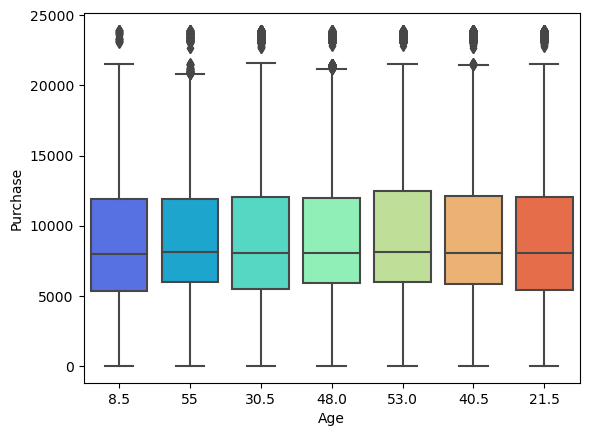

In [22]:
# Check for outliers
sns.boxplot(x="Age", y="Purchase", data=df, palette='rainbow')

The Above plot shows presence of outliers above 20000

Let's look a the total number of outliers present in this distribution

In [23]:
def checking_outliers(column):
    # Group the data
    data = df.groupby(column)['Purchase']

    # Calculate the IQR for 'Purchase' in the Age Group
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1

    #Calculate the upper and lower bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    #Identify the outliers
    outliers_count = (df['Purchase'] < df[column].replace(lower_bound)) | (df['Purchase'] > df[column].replace(upper_bound))
    outliers_by_col = outliers_count.groupby(df[column]).sum()
    print(f'Outliers in the {column} and Purchase distribution:\n {outliers_by_col}')
    return lower_bound, upper_bound

lower_bound,upper_bound = checking_outliers('Age')

Outliers in the Age and Purchase distribution:
 Age
8.5      56
21.5    262
30.5    816
40.5    586
48.0    303
53.0    278
55      250
dtype: int64


These are the outliers present in the Purchase column with respect to each age group

In [24]:
def remove_outliers(column):
    # Group the data
    data_grouped = df.groupby(column)['Purchase']

    # Calculate the IQR for 'Purchase' in the Age Group
    q1 = data_grouped.quantile(0.25)
    q3 = data_grouped.quantile(0.75)
    IQR = q3 - q1

    # Calculate the upper and lower bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers_count = (df['Purchase'] < data_grouped.transform(lambda x: x.replace(lower_bound.loc[x.name])))
    outliers_count |= (df['Purchase'] > data_grouped.transform(lambda x: x.replace(upper_bound.loc[x.name])))
    outliers_by_col = outliers_count.groupby(df[column]).sum()
    print(f'Outliers in the {column} and Purchase distribution:\n{outliers_by_col}')
    return lower_bound, upper_bound

# Call the function to get lower and upper bounds for each age group
lower_bound, upper_bound = remove_outliers('Age')

# Handle outliers by clipping 'Purchase' values within the lower and upper bounds for each age group
df['Purchase'] = df.groupby('Age',group_keys=False)['Purchase'].apply(lambda x: np.clip(x, lower_bound.loc[x.name], upper_bound.loc[x.name]))

# Now the 'Purchase' column should have outliers handled within each age group


Outliers in the Age and Purchase distribution:
Age
8.5     0
21.5    0
30.5    0
40.5    0
48.0    0
53.0    0
55      0
Name: Purchase, dtype: int64


There are no more outliers in the data

<Axes: xlabel='Age', ylabel='Purchase'>

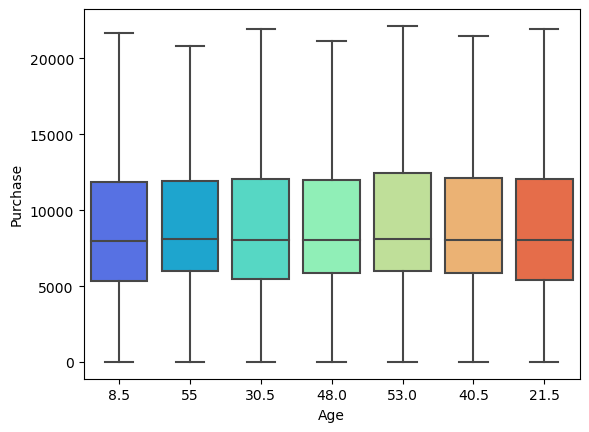

In [25]:
# Check for outliers
sns.boxplot(x="Age", y="Purchase", data=df, palette='rainbow')

<Axes: xlabel='Gender', ylabel='Purchase'>

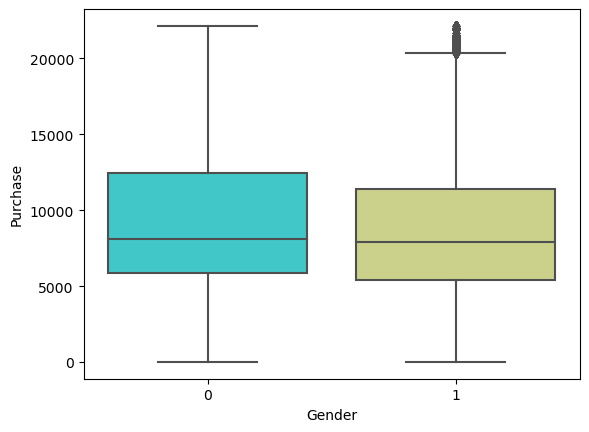

In [26]:
# Check for outliers
sns.boxplot(x="Gender", y="Purchase", data=df, palette='rainbow')

There are some outliers in the Female Category

In [27]:
lower_bound,upper_bound = checking_outliers('Gender')

Outliers in the Gender and Purchase distribution:
 Gender
0       0
1    2065
dtype: int64


In [28]:
# Call the function to get lower and upper bounds for each age group
lower_bound, upper_bound = remove_outliers('Gender')

# Handle outliers by clipping 'Purchase' values within the lower and upper bounds for each age group
df['Purchase'] = df.groupby('Gender',group_keys=False)['Purchase'].apply(lambda x: np.clip(x, lower_bound.loc[x.name], upper_bound.loc[x.name]))

Outliers in the Gender and Purchase distribution:
Gender
0    0
1    0
Name: Purchase, dtype: int64


<Axes: xlabel='Occupation', ylabel='Purchase'>

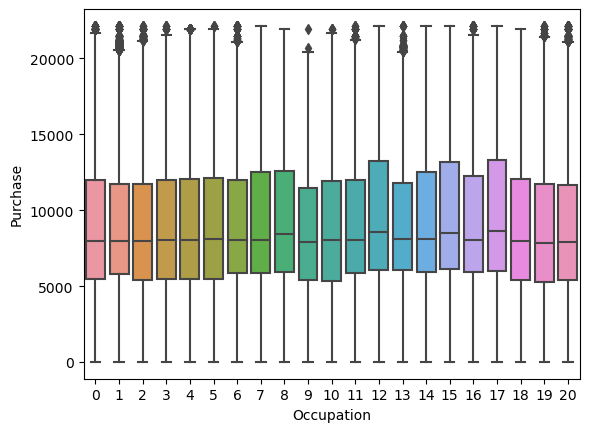

In [29]:
sns.boxplot(data=df, x="Occupation",y="Purchase")

In [30]:
lower_bound, upper_bound = checking_outliers('Occupation')

Outliers in the Occupation and Purchase distribution:
 Occupation
0     125
1     410
2     130
3      23
4     114
5       3
6      73
7       0
8       0
9       2
10      4
11     65
12      0
13    115
14      0
15      0
16     46
17      0
18      0
19     39
20    190
dtype: int64


In [31]:
lower_bound, upper_bound = remove_outliers('Occupation')
df['Purchase'] = df.groupby('Occupation',group_keys=False)['Purchase'].apply(lambda x: np.clip(x, lower_bound.loc[x.name], upper_bound.loc[x.name]))

Outliers in the Occupation and Purchase distribution:
Occupation
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
Name: Purchase, dtype: int64


Outliers have been removed

# Data Visualization

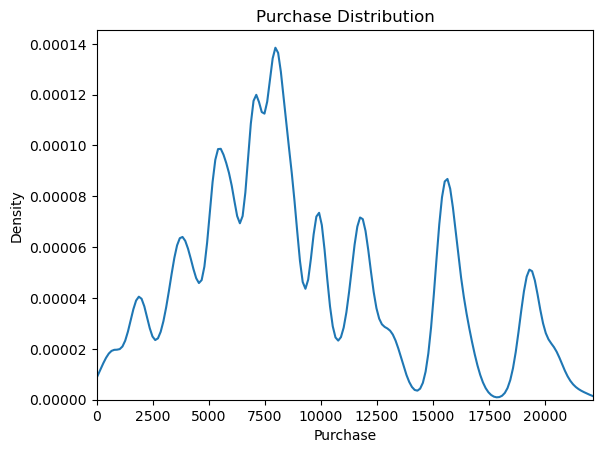

In [32]:
sns.kdeplot(df['Purchase'])
plt.title("Purchase Distribution")
plt.xlabel("Purchase")
plt.ylabel("Density")
plt.xlim(0, df['Purchase'].max())  # Set x-axis limit to include the maximum value of 'Purchase'
plt.show()

From the above distribution we can see that the maximum purchase amount is around 7500

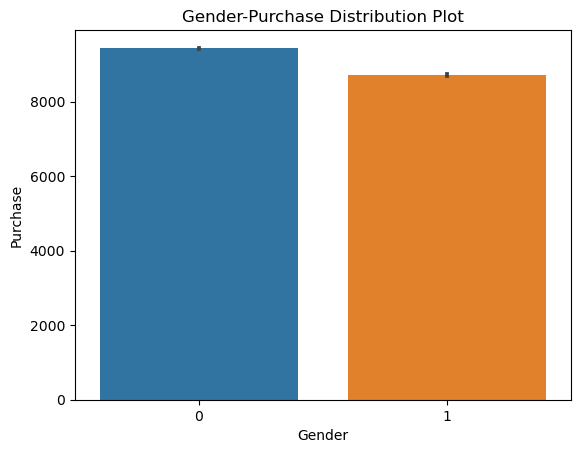

In [33]:
sns.barplot(data=df,x='Gender',y="Purchase",)
plt.title("Gender-Purchase Distribution Plot")
plt.show()

Male Purchase seems to be more than Female Purchase

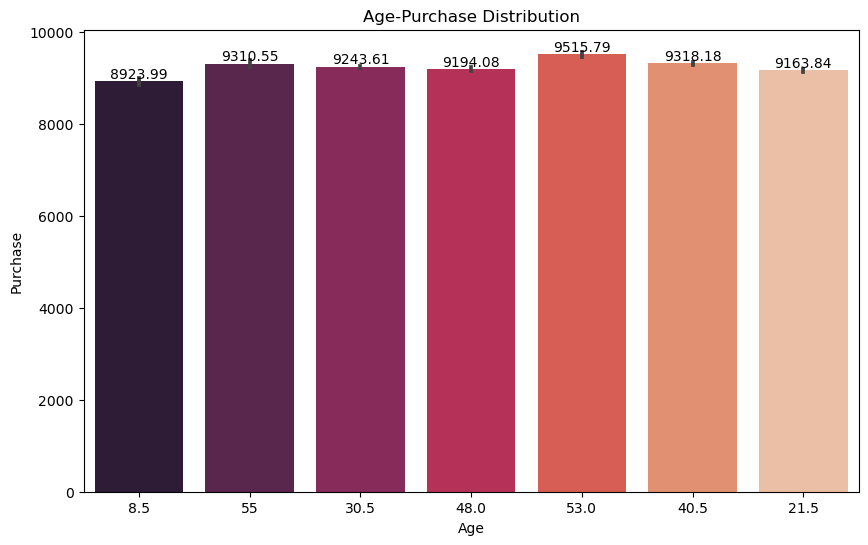

In [34]:
plt.figure(figsize=(10,6))
a = sns.barplot(data=df,x='Age',y='Purchase',palette = "rocket")
plt.bar_label(a.containers[0])
plt.title("Age-Purchase Distribution")
plt.show()

There not a lot of variations between the purchase rate of different age groups, but most purchases happends to be from people above 50

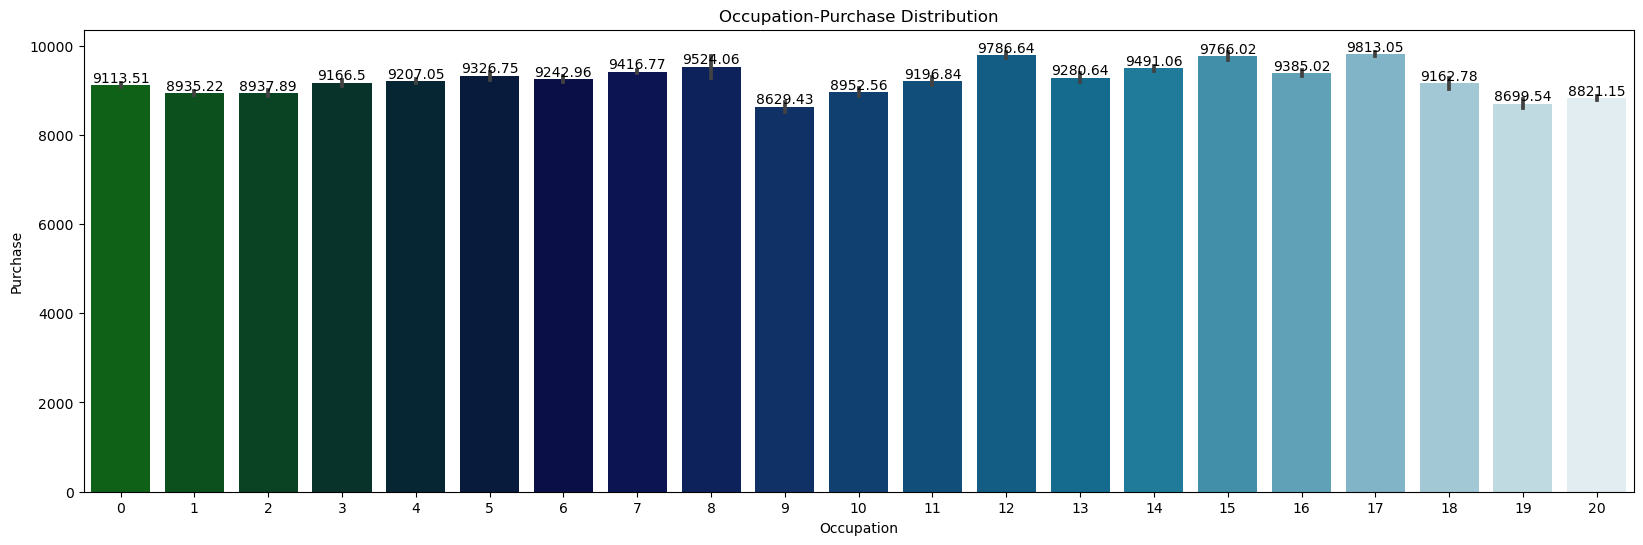

In [35]:
plt.figure(figsize=(20,6))
a = sns.barplot(data=df,x='Occupation',y='Purchase',palette = "ocean")
plt.bar_label(a.containers[0])
plt.title("Occupation-Purchase Distribution")
plt.show()

Highest purchase is done by people with Occupation 17

Lowest purchase is done by people with Occupation 9

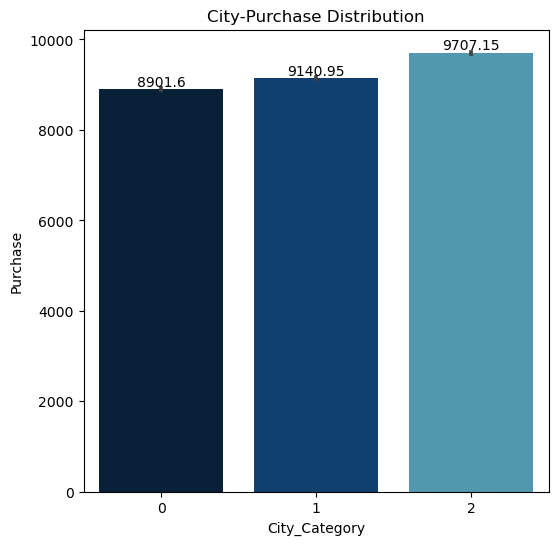

In [36]:
plt.figure(figsize=(6,6))
a = sns.barplot(data=df,x='City_Category',y='Purchase',palette = "ocean")
plt.bar_label(a.containers[0])
plt.title("City-Purchase Distribution")
plt.show()

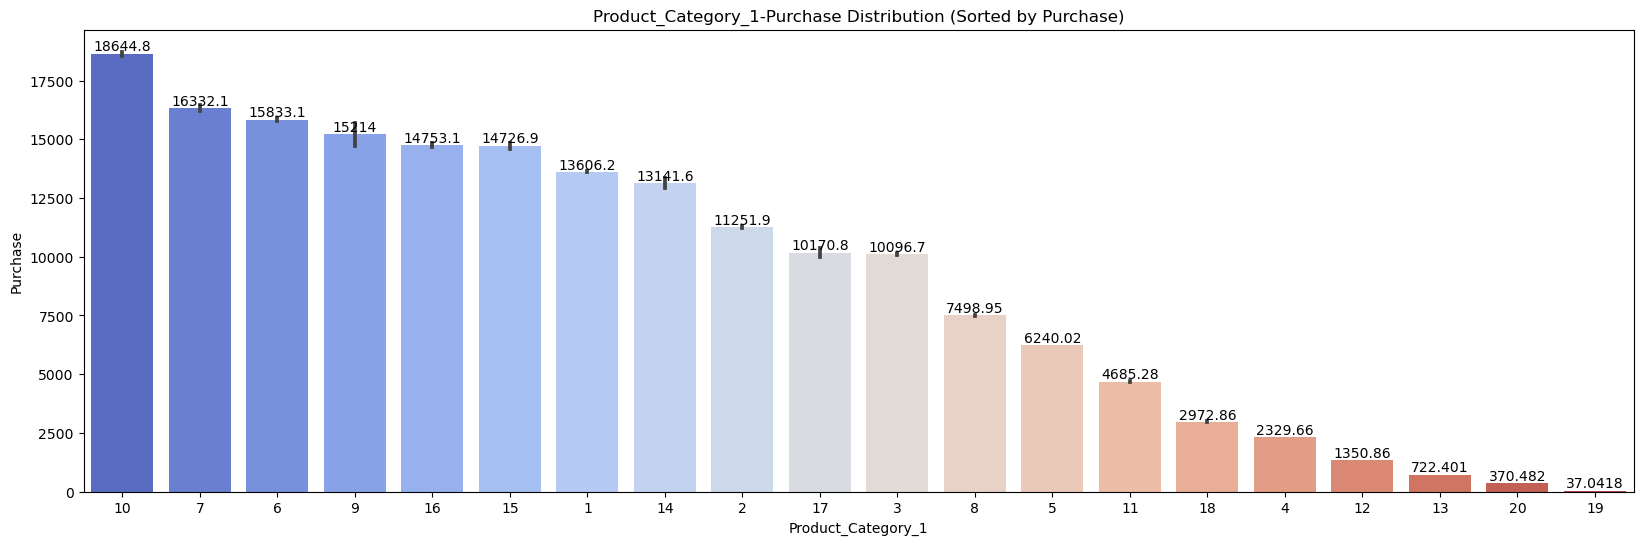

In [37]:
sorted_categories = df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).index

# Bar plot with values sorted based on mean 'Purchase' in descending order
plt.figure(figsize=(20, 6))
a = sns.barplot(data=df, x='Product_Category_1', y='Purchase', palette='coolwarm', order=sorted_categories)
plt.bar_label(a.containers[0])
plt.title("Product_Category_1-Purchase Distribution (Sorted by Purchase)")
plt.show()

In Product Category 1 the 10th product has been purchase maximum time

In Product Category 1 the 19th product has been purchase least time

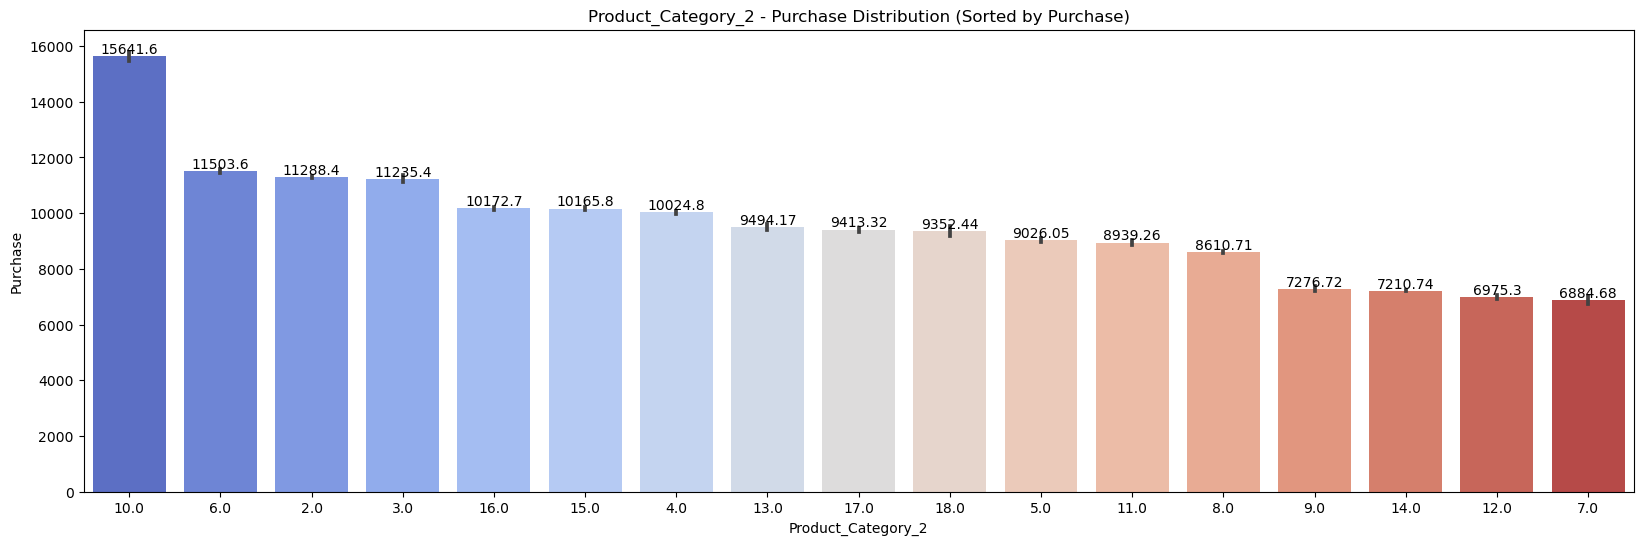

In [38]:
sorted_categories = df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False).index

# Bar plot with values sorted based on mean 'Purchase' in descending order
plt.figure(figsize=(20, 6))
a = sns.barplot(data=df, x='Product_Category_2', y='Purchase', palette='coolwarm', order=sorted_categories)
plt.bar_label(a.containers[0])
plt.title("Product_Category_2 - Purchase Distribution (Sorted by Purchase)")
plt.show()

In Product Category 2 the 10th product has been purchase maximum time

In Product Category 2 the 7th product has been purchase least time

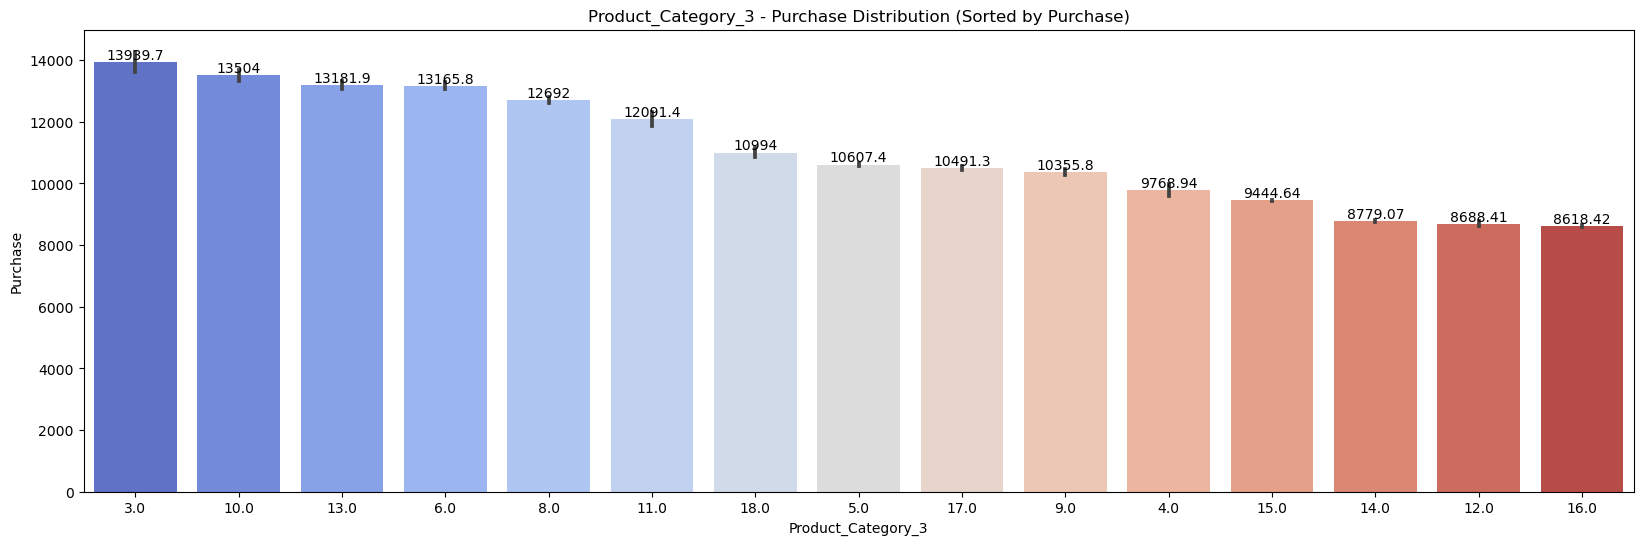

In [39]:
sorted_categories = df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False).index

# Bar plot with values sorted based on mean 'Purchase' in descending order
plt.figure(figsize=(20, 6))
a = sns.barplot(data=df, x='Product_Category_3', y='Purchase', palette='coolwarm', order=sorted_categories)
plt.bar_label(a.containers[0])
plt.title("Product_Category_3 - Purchase Distribution (Sorted by Purchase)")
plt.show()

In Product Category 3 the 3rd product has been purchase maximum time

In Product Category 3 the 16th product has been purchase least time

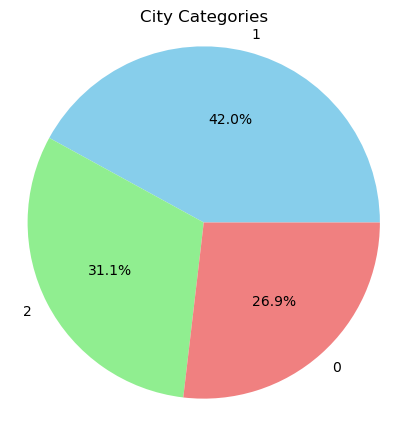

In [40]:
# Count the occurrences of each category in 'City_Category'
city_category_counts = df['City_Category'].value_counts()

# Create a pie chart using plt.pie()
plt.figure(figsize=(5,5))
plt.pie(city_category_counts, labels=city_category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("City Categories")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

most of the population belongs to the city B

### Purchase Distribution by each column

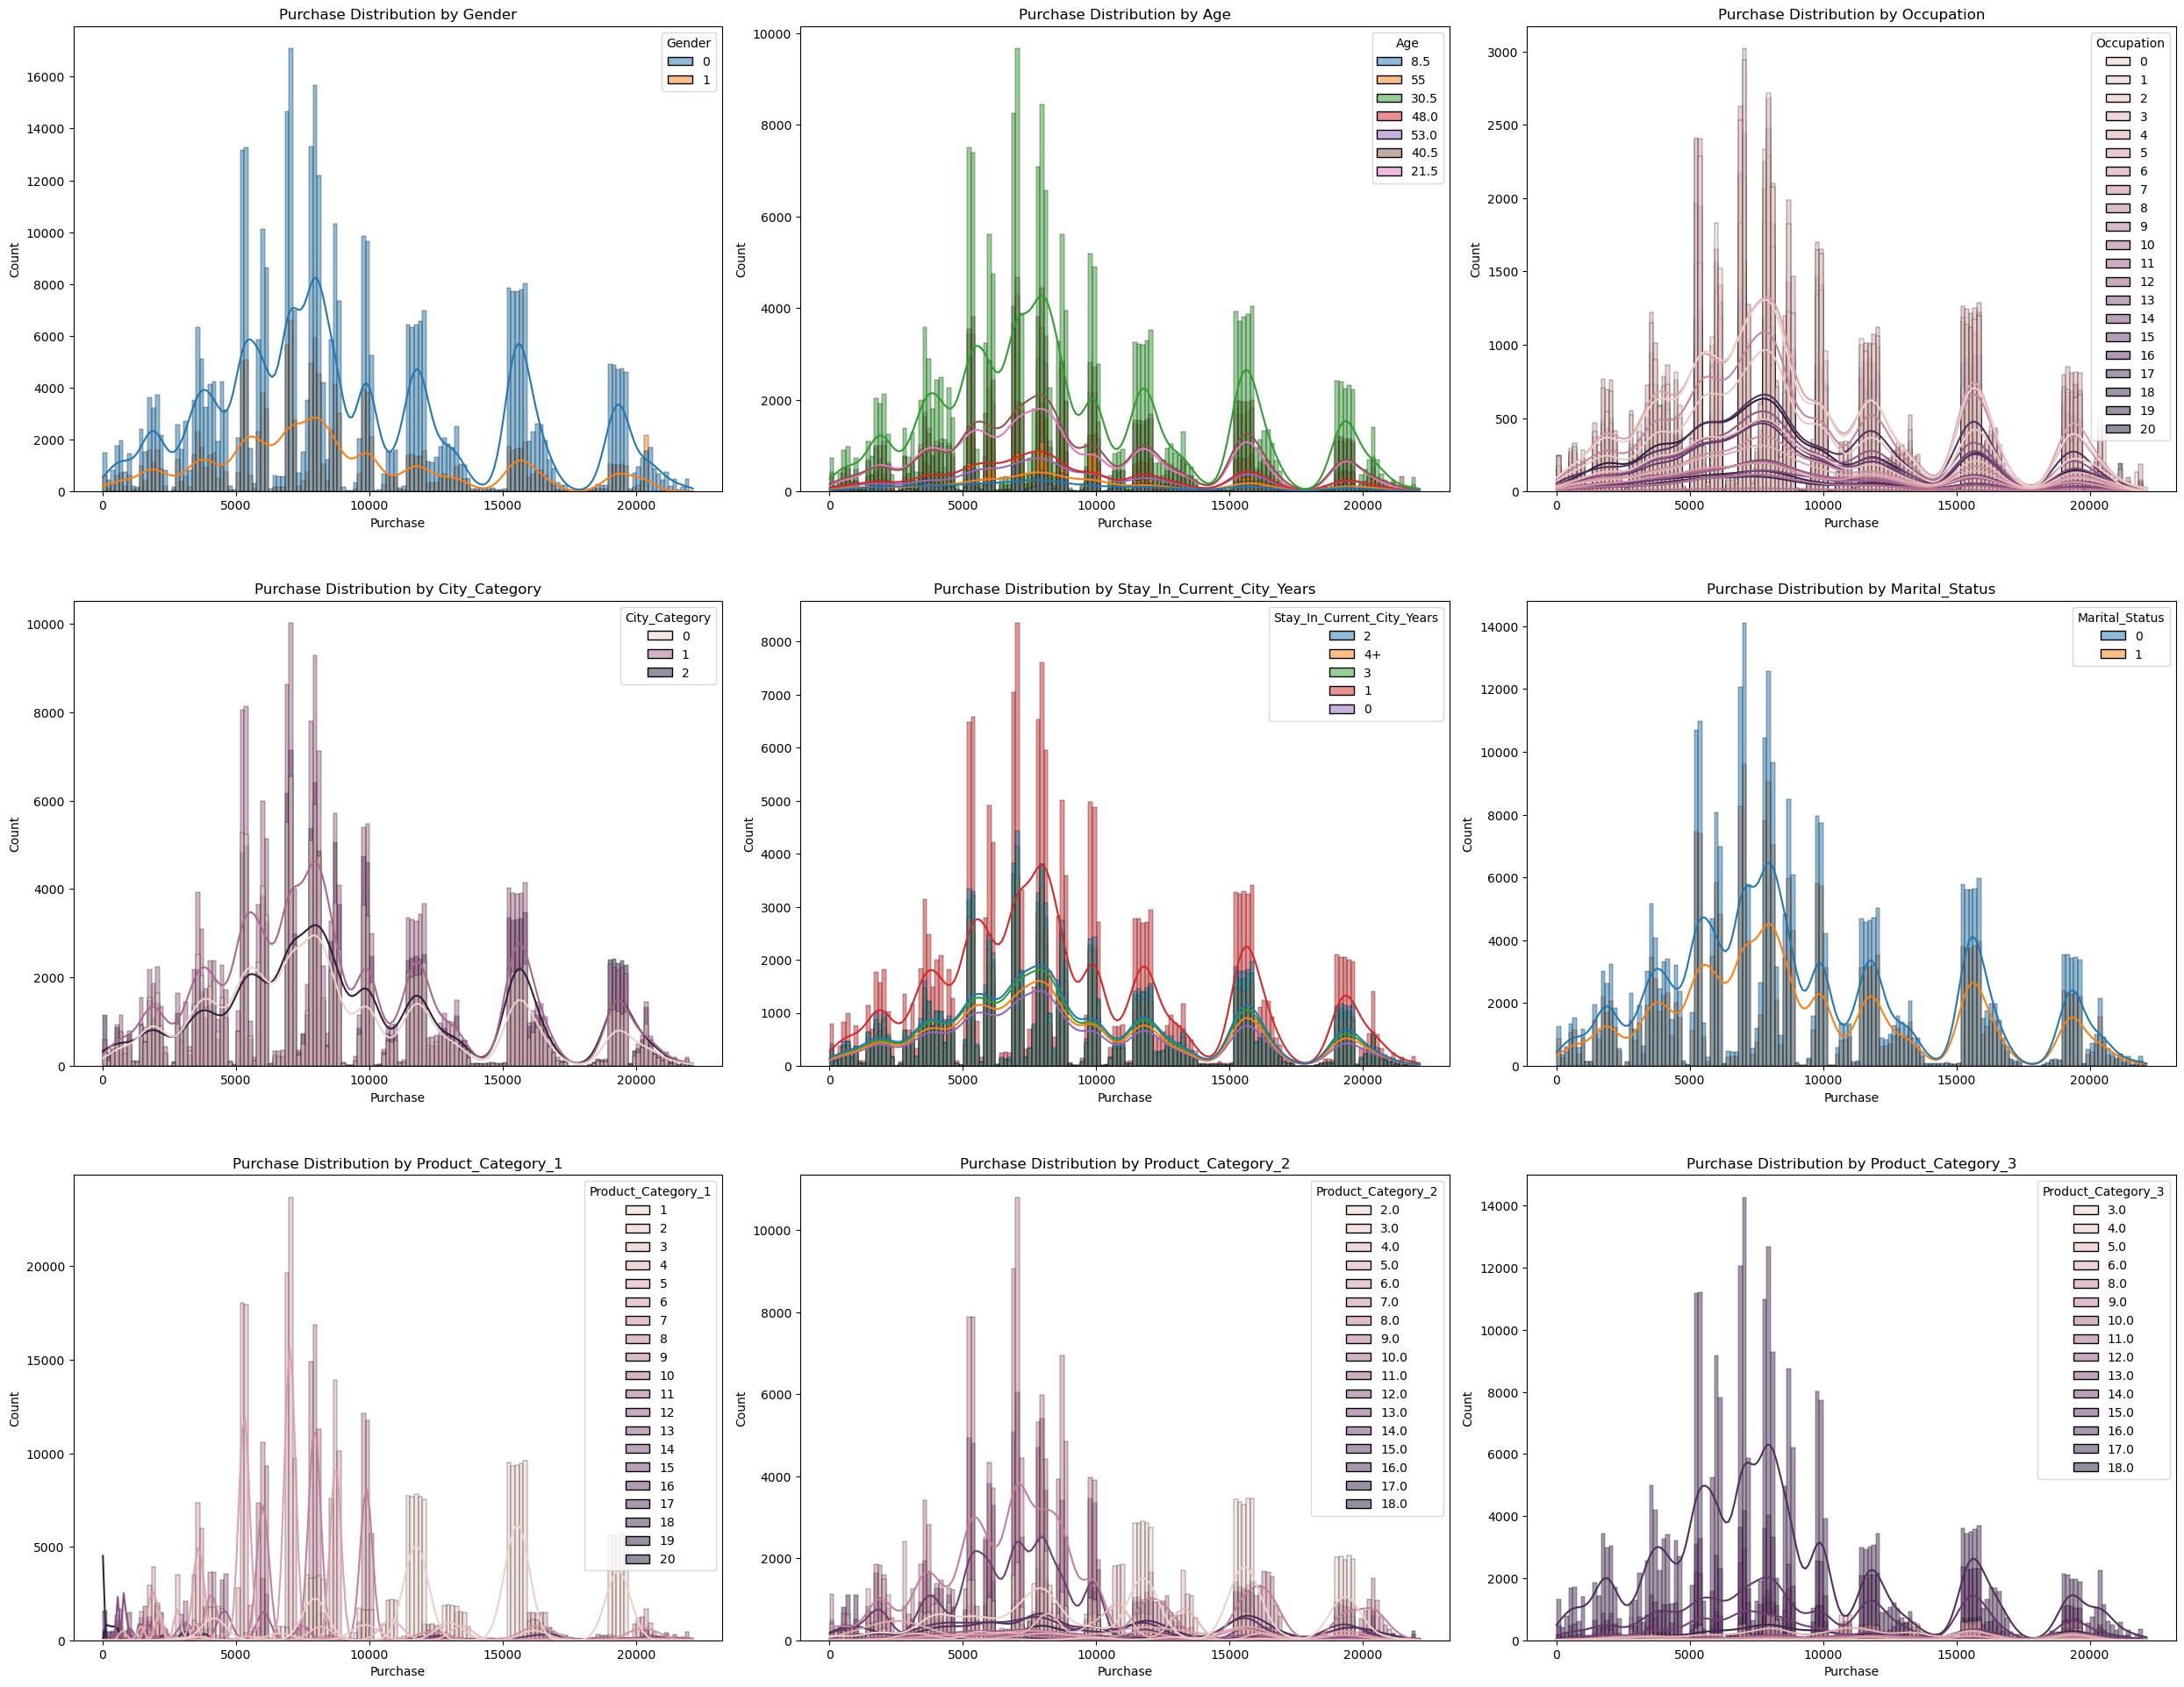

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'

# Columns for which you want to create subplots
columns_for_subplots = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
                        'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Create subplots with 3 rows and 3 columns (adjust the size as needed)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)  # Adjust the horizontal space between subplots

# Loop through each column and create a subplot
for i, column in enumerate(columns_for_subplots):
    # Determine the row and column index for each subplot
    row_index = i // 3
    col_index = i % 3
    
    # Plot the distribution of 'Purchase' for each column
    sns.histplot(data=df, x='Purchase', hue=column, kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Purchase Distribution by {column}')
    axes[row_index, col_index].set_xlabel('Purchase')
    axes[row_index, col_index].set_ylabel('Count')

# Show the subplots
plt.tight_layout()
plt.show()


### Black_Friday Analytics

In [42]:
# Average purchase of each gender population in each city
def city_gender(gender):
    data = df[df['Gender']==gender]
    city_gender = data.groupby('City_Category').agg({'Gender':'count','Purchase':'mean','Age':pd.Series.mode}).reset_index()
    
    Product_min = df.groupby('City_Category')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].min().reset_index()
    Product_min.rename(columns = {'Product_Category_1':'Min_Product_1','Product_Category_2':'Min_Product_2','Product_Category_3':'Min_Product_3'},inplace=True)
    city_gender = city_gender.set_index('City_Category').join(Product_min.set_index('City_Category')[['Min_Product_1', 'Min_Product_2', 'Min_Product_3']]).reset_index()
    
    Product_max = df.groupby('City_Category')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].max().reset_index()
    Product_max.rename(columns = {'Product_Category_1':'Max_Product_1','Product_Category_2':'Max_Product_2','Product_Category_3':'Max_Product_3'},inplace=True)
    city_gender = city_gender.set_index('City_Category').join(Product_max.set_index('City_Category')[['Max_Product_1', 'Max_Product_2', 'Max_Product_3']])
    return city_gender

In [43]:
city_gender(0)

,Gender,Purchase,Age,Min_Product_1,Min_Product_2,Min_Product_3,Max_Product_1,Max_Product_2,Max_Product_3
City_Category,,,,,,,,,
0,112016,9009.350182,30.5,1,2.0,3.0,20,18.0,18.0
1,173377,9345.978746,30.5,1,2.0,3.0,20,18.0,18.0
2,128851,9902.855831,30.5,1,2.0,3.0,20,18.0,18.0


The above table shows that highest purchase rate of male population is from the city C that is 9903 approx

Age group with highest purchase rate = around 30

It also shows the maximun and minimum product category bought in each city

In [44]:
city_gender(1)

,Gender,Purchase,Age,Min_Product_1,Min_Product_2,Min_Product_3,Max_Product_1,Max_Product_2,Max_Product_3
City_Category,,,,,,,,,
0,35704,8563.569600,30.5,1,2.0,3.0,20,18.0,18.0
1,57796,8525.899777,30.5,1,2.0,3.0,20,18.0,18.0
2,42309,9111.149614,30.5,1,2.0,3.0,20,18.0,18.0


The highest purchase of Female population is from the city C that is 9111 approx

Age group with highest purchase rate = around 30

It also shows the maximun and minimum product category bought in each city